# <span style='background:black'><span style='color:Cyan'> <span style='font-family:"Times New Roman"'> Objective: 
## <span style='font-family:"Times New Roman"'> This code, generates Concentric Gaussian Dataset. 

### <span style='font-family:"Times New Roman"'>Loading Required Modules:

In [1]:
from matplotlib import pyplot as plt
from scipy.special import gammainc
import pandas as pd
import numpy as np
import math
plt.style.use('ggplot')

### <span style='font-family:"Times New Roman"'>Implemented Functions:  

In [2]:
def concentGauss(N,Me,Var):
    dimension = len(Me)
    a = np.array(Me)
    p = np.random.randn(dimension,N)
    h = np.tile(a, (2, N//2))
    x = math.sqrt(Var) * p + h
    return x

In [3]:
def doublemoon(center,r1,r2,n_points):
    nd = center.size
    x = np.random.normal(size=(n_points, nd))
    sq = np.sum(x**2,axis=1)
    z = (r2-r1)/r2
    fr = (r2-r1)*gammainc(nd/2**z,sq/2**z)**(1/nd)/np.sqrt(sq) + r1/np.sqrt(sq)
    frtiled = np.tile(fr.reshape(n_points,1),(1,nd))
    p = center + np.multiply(x,frtiled)
    return p

In [4]:
r1 = float(input("Enter interior circle radius (In this problem = 3): "))
R2 = float(input("Enter main circle radius (In this problem = 6): "))
Var = float(input("Enter variance of data set (In this problem = 1) :"))
N = int(input("Number of drawn sample : "))

Enter interior circle radius (In this problem = 3): 3
Enter main circle radius (In this problem = 6): 6
Enter variance of data set (In this problem = 1) :1
Number of drawn sample : 250


In [5]:
center = np.array([0,0])
p = doublemoon(center,r1,R2,200)
p1 = doublemoon(center,5.5,7.5,47)
p2 = doublemoon(center,7.5,8,3)
Me = [0,0]
X = concentGauss(N, Me, Var)
rowonex= X[0]
rowtwox = X[1]

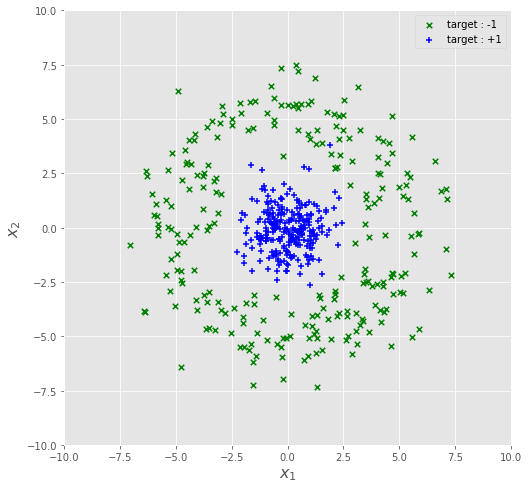

In [6]:
plt.figure(figsize=(8,8))
fig1 = plt.figure(1)
ax1 = fig1.gca()
plt.scatter(p[:,0],p[:,1],marker ='x' , color = 'g', s=30)
plt.scatter(p1[:,0],p1[:,1],marker ='x' ,s=30, color = 'g')
plt.scatter(p2[:,0],p2[:,1],marker ='x' ,s=30, color = 'g', label = "target : -1" )
plt.scatter(rowonex,rowtwox , marker ='+' ,s=30, color = 'b', label = "target : +1")
plt.legend()
ax1.set_xlim(-10,10)
ax1.set_ylim(-10,10)
plt.xlabel('$x_1$', fontsize=16)
plt.ylabel('$x_2$', fontsize=16)
plt.show()